In [1]:
#importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading our data from csv

In [4]:
df = pd.read_csv("../Data/Advertising.csv")

In [5]:
#information of our dataframe i.e. length and dtype

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#description of our data min, max, std, mean count

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
#quick look at the data and its columns (head --> 5 by default)

In [10]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
#Though our data has three modes of expenditure and we are focusing on simple linear regression we will create a new column
#to make it simple lets create a new column total expenditure on the advertisement 

In [12]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [13]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [14]:
#let's plot the total_spend vs the sales 

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

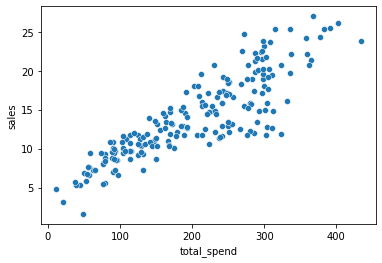

In [15]:
sns.scatterplot(x='total_spend',y='sales',data=df)

In [16]:
#let's make use of seaborn regplot to plot a best fit line using OLS(internally done by regplot)

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

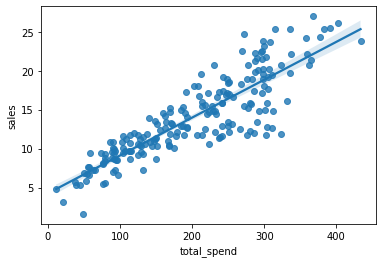

In [17]:
sns.regplot(x='total_spend',y='sales',data=df)

In [18]:
#spliting the data into X and y 

In [19]:
X = df['total_spend']
y = df['sales']

In [20]:
#let's use the np.polyfit with degree 1 to fit our data inorder to get the slope and intercept 

In [21]:
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [22]:
#with this slope and intercept let's plot a line and see how it fits

In [23]:
potential_spend = np.linspace(0,500,100)

In [24]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

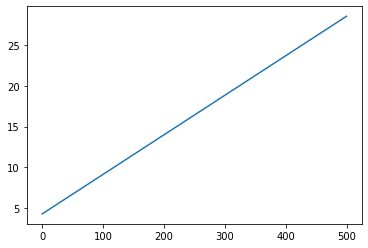

In [25]:
plt.plot(potential_spend,predicted_sales)

In [26]:
#let's plot this line over our scatterplot with a different color

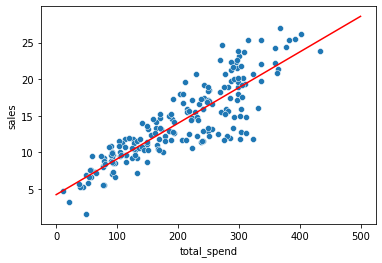

In [27]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

In [28]:
#time to test lets assume that the total spend on advertisement is 200 what would be the expected sales?

In [29]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [30]:
predicted_sales

13.98060422

In [31]:
#After using the formula y = b1x + b0 we got 13.9 approx 14 sales will be acheived if 200 was the total expense on advertisement